In [1]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.utils import to_categorical
from keras.datasets import cifar100
from keras.optimizers import Adam

In [2]:
(x_train, y_train), (x_test, y_test) = cifar100.load_data()
x_train = x_train / 255.0
x_test = x_test / 255.0

In [3]:
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)


In [4]:
y_train = to_categorical(y_train, 100)
y_test = to_categorical(y_test, 100)

In [5]:
model = Sequential()

model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(100, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 64)        1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 10, 10, 128)       147584    
                                                        

In [7]:
history = model.fit(x_train, y_train, verbose=1,epochs=50, batch_size=128, validation_split=0.2, shuffle=True)

Epoch 1/50
313/313 [==============================] - 129s 410ms/step - loss: 4.1134 - accuracy: 0.0688 - val_loss: 3.5931 - val_accuracy: 0.1554
Epoch 2/50
313/313 [==============================] - 127s 407ms/step - loss: 3.5340 - accuracy: 0.1591 - val_loss: 3.2643 - val_accuracy: 0.2159
Epoch 3/50
313/313 [==============================] - 116s 369ms/step - loss: 3.2229 - accuracy: 0.2178 - val_loss: 3.0145 - val_accuracy: 0.2697
Epoch 4/50
313/313 [==============================] - 118s 379ms/step - loss: 3.0223 - accuracy: 0.2563 - val_loss: 2.8317 - val_accuracy: 0.2999
Epoch 5/50
313/313 [==============================] - 128s 410ms/step - loss: 2.8679 - accuracy: 0.2815 - val_loss: 2.6945 - val_accuracy: 0.3308
Epoch 6/50
313/313 [==============================] - 122s 389ms/step - loss: 2.7221 - accuracy: 0.3131 - val_loss: 2.5663 - val_accuracy: 0.3557
Epoch 7/50
313/313 [==============================] - 152s 487ms/step - loss: 2.6078 - accuracy: 0.3349 - val_loss: 2.4965 -

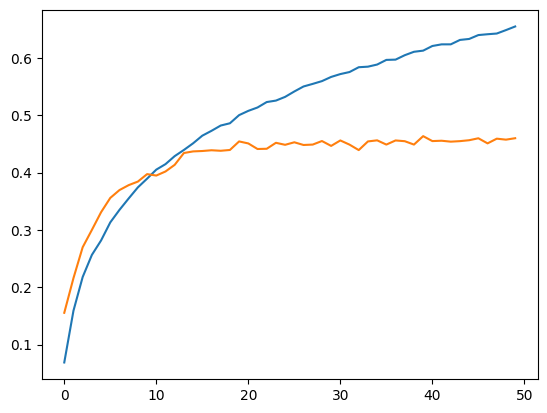

In [9]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [11]:
accuracy = model.evaluate(x_test, y_test)[1]
print(f'Test Accuracy: {accuracy * 100:.2f}%')

313/313 [==============================] - 5s 16ms/step - loss: 2.2197 - accuracy: 0.4560
Test Accuracy: 45.60%
